**BUSINESS UNDERSTANDING**
>***Objectives:***
>> - ***Diversify company portfolio by entering the aviation industry.***
>> - ***Minimize risk when purchasing and operating air-crafts.***
>> - ***Develop a data-driven strategy for air-craft acquisition.***

**Problem Statement:**
>***The company aims to expand into the aviation industry by purchasing and operating aircraft for both commercial and private enterprises. However, there is a lack of expertise and data regarding the potential risks associated with different aircraft models. The objective is to determine which aircraft models present the lowest operational and safety risks, thus ensuring a cost-effective and safe investment.***
>> **Specific Goals**
>>> - Identify low-risk aircraft.
>>> - Understand market demand for different types of aircraft.
>>> - Strategic expansion; provide actionable insights that can guide the strategic expansion into the aviation industry.


>> **Research questions**
>>> - Which aircraft models present the lowest operational risks?
>>> - What constitutes low risk i.e. fewer fatal injuries, fewer accidents?
>>> - What are the key factors that contribute to aircraft safety and operational efficiency?
>>> - How will the company use this insight to make informed investment decisions?

>> **Success Criteria**
>>> - Provide actionable insights about aircraft safety risks supported by statistical analysis

**DATA UNDERSTANDING**

In [1]:
#Importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Exploring the data
df_aviation = pd.read_csv('/content/AviationData.csv', encoding='latin-1', low_memory=False)
df_aviation.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

In [3]:
print(df_aviation.info)
print(df_aviation.describe)

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
74478  20131112X12840           Accident      CEN14LA048  2013-11-09   
74479  20131112X93534           Accident      CEN14LA050  2013-11-09   
74480  20131113X51744           Accident      WPR14LA049  2013-11-09   
74481  20131110X03324           Accident      CEN14FA046  2013-11-10   
74482      20131111X2                NaN             NaN         NaN   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [4]:
df_aviation.shape

(74483, 31)

###***Sorting out the missing Values***

In [5]:
#Checking for the number of missing values per column to check the usefulness of each column.
df_aviation.isna().sum()
missing_percentages = df_aviation.isnull().mean() * 100
print("Columns with high missing percentages:")
print(missing_percentages[missing_percentages > 20])


Columns with high missing percentages:
Latitude             70.783937
Longitude            70.796021
Airport.Code         44.093283
Airport.Name         40.497832
Aircraft.Category    75.713921
FAR.Description      75.497765
Schedule             84.988521
Air.carrier          85.931018
dtype: float64


In [6]:
#Removing less relevant columns.
df_aviation.drop(['Event.Id','Investigation.Type','Accident.Number','Purpose.of.flight'], axis=1, inplace=True)

In [7]:
df_aviation.shape

(74483, 27)

In [8]:
#Removing duplicates from the data
df_aviation.drop_duplicates(inplace=True)
df_aviation.shape

(74483, 27)

In [9]:
print(df_aviation.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74483 entries, 0 to 74482
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              74482 non-null  object 
 1   Location                74430 non-null  object 
 2   Country                 74256 non-null  object 
 3   Latitude                21761 non-null  object 
 4   Longitude               21752 non-null  object 
 5   Airport.Code            41641 non-null  object 
 6   Airport.Name            44319 non-null  object 
 7   Injury.Severity         74236 non-null  object 
 8   Aircraft.damage         72356 non-null  object 
 9   Aircraft.Category       18089 non-null  object 
 10  Registration.Number     73103 non-null  object 
 11  Make                    74421 non-null  object 
 12  Model                   74393 non-null  object 
 13  Amateur.Built           74380 non-null  object 
 14  Number.of.Engines       71220 non-null

###***Replacing the missing values in the columns with the mode for categorical values and median for numerical values***

In [10]:
#Identifying the Categorical columns and numeric columns
numeric_columns = df_aviation.select_dtypes(include=['float', 'int']).columns
categorical_columns = df_aviation.select_dtypes(include=['object', 'category']).columns

#Filling Numerical columns with the median
df_aviation[numeric_columns] = df_aviation[numeric_columns].apply(lambda col: col.fillna(col.median()), axis=0)

#Filling Categorical columns with mode
df_aviation[categorical_columns] = df_aviation[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]), axis=0)
df_aviation.to_csv('aviation_data3.csv', index=False)
print(df_aviation)





       Event.Date         Location        Country   Latitude    Longitude  \
0      1948-10-24  MOOSE CREEK, ID  United States  32.815556  -104.673056   
1      1962-07-19   BRIDGEPORT, CA  United States  32.815556  -104.673056   
2      1974-08-30    Saltville, VA  United States  36.922223   -81.878056   
3      1977-06-19       EUREKA, CA  United States  32.815556  -104.673056   
4      1979-08-02       Canton, OH  United States  32.815556  -104.673056   
...           ...              ...            ...        ...          ...   
74478  2013-11-09   Shreveport, LA  United States    323211N     0944536W   
74479  2013-11-09    Concordia, KS  United States    393329N     0973911W   
74480  2013-11-09     Temecula, CA  United States    033340N     0011770W   
74481  2013-11-10       Owasso, OK  United States    361751N     0955228W   
74482  1982-05-16    ANCHORAGE, AK  United States  32.815556  -104.673056   

      Airport.Code  Airport.Name Injury.Severity Aircraft.damage  \
0      

###***Verifying if the data still has missing values***

In [11]:
df_aviation.isna().sum()

Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

###***Sorting out which aircraft make and model is the most susceptible to aviation accidents***

In [12]:
#Analyzing aircraft damage per make and model
print(df_aviation['Aircraft.damage'].value_counts())
print(df_aviation['Make'].value_counts())
print(df_aviation['Model'].value_counts())


Aircraft.damage
Substantial    55473
Destroyed      16663
Minor           2347
Name: count, dtype: int64
Make
Cessna                      21526
Piper                       11564
Beech                        4152
CESSNA                       2236
Bell                         2064
                            ...  
Riekkenen                       1
Valley Adventurers, Inc.        1
Poor Boys Toys Inc              1
Iverslie                        1
FIREFLY BALLOONS, INC           1
Name: count, Length: 6506, dtype: int64
Model
152          2317
172          1154
172N         1097
PA-28-140     886
172M          741
             ... 
747-2R7F        1
NA-265-25       1
GC-1-A          1
737-3S3         1
MU 2B-25        1
Name: count, Length: 10431, dtype: int64


In [13]:
damage_analysis = df_aviation.groupby(['Make', 'Model', 'Aircraft.damage']).size().reset_index(name='Count')
print(damage_analysis)


                           Make              Model Aircraft.damage  Count
0      107.5 Flying Corporation  One Design DR 107       Destroyed      1
1                          1200               G103     Substantial      1
2              1977 Colfer-chan      STEEN SKYBOLT     Substantial      1
3                    1st Ftr Gp     FOCKE-WULF 190       Destroyed      1
4                    2000 Mccoy            Genesis       Destroyed      1
...                         ...                ...             ...    ...
19398              de Havilland         DHC-2 MK I     Substantial      1
19399              de Havilland              DHC-3     Substantial      1
19400              de Havilland          DHC-6-200     Substantial      1
19401              de Havilland          DHC-8-202     Substantial      1
19402                   unknown                kit     Substantial      1

[19403 rows x 4 columns]


In [14]:
mode_make = damage_analysis['Make'].mode()[0]
mode_model = damage_analysis['Model'].mode()[0]
mode_aircraftd = damage_analysis['Aircraft.damage'].mode()[0]
print("Mode:", mode_make)
print("Mode:", mode_model)
print("Mode:", mode_aircraftd)


Mode: Cessna
Mode: RV-4
Mode: Substantial


In [15]:
pivot_table = damage_analysis.pivot_table(
    index=['Make', 'Model'],
    columns='Aircraft.damage',
    values='Count',
    fill_value=0
)
print(pivot_table)



Aircraft.damage                             Destroyed  Minor  Substantial
Make                     Model                                           
107.5 Flying Corporation One Design DR 107        1.0    0.0          0.0
1200                     G103                     0.0    0.0          1.0
1977 Colfer-chan         STEEN SKYBOLT            0.0    0.0          1.0
1st Ftr Gp               FOCKE-WULF 190           1.0    0.0          0.0
2000 Mccoy               Genesis                  1.0    0.0          0.0
...                                               ...    ...          ...
de Havilland             DHC-2 MK I               0.0    0.0          1.0
                         DHC-3                    0.0    0.0          1.0
                         DHC-6-200                0.0    0.0          1.0
                         DHC-8-202                0.0    0.0          1.0
unknown                  kit                      0.0    0.0          1.0

[16451 rows x 3 columns]


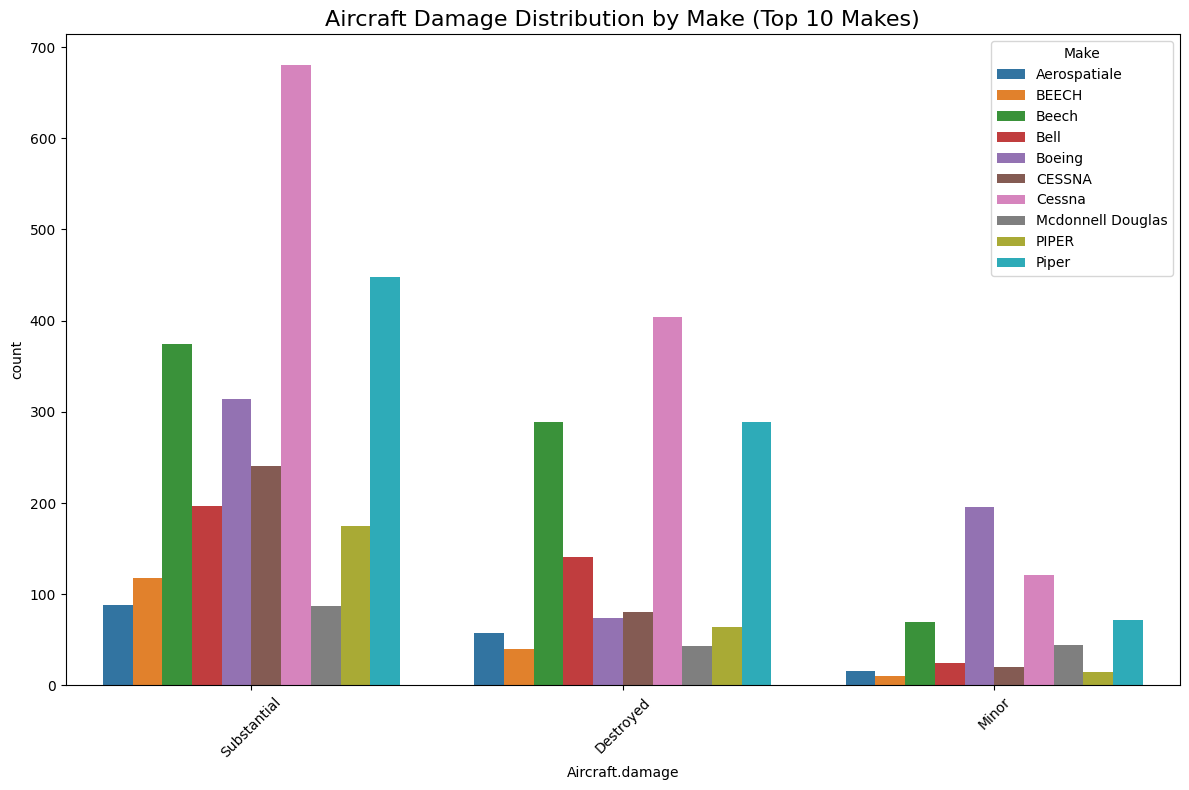

In [16]:
top_makes = damage_analysis['Make'].value_counts().head(10).index
filtered_df = damage_analysis[damage_analysis['Make'].isin(top_makes)]


plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_df,
    x='Aircraft.damage',
    hue='Make',
    order=damage_analysis['Aircraft.damage'].value_counts().index
)
plt.title('Aircraft Damage Distribution by Make (Top 10 Makes)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


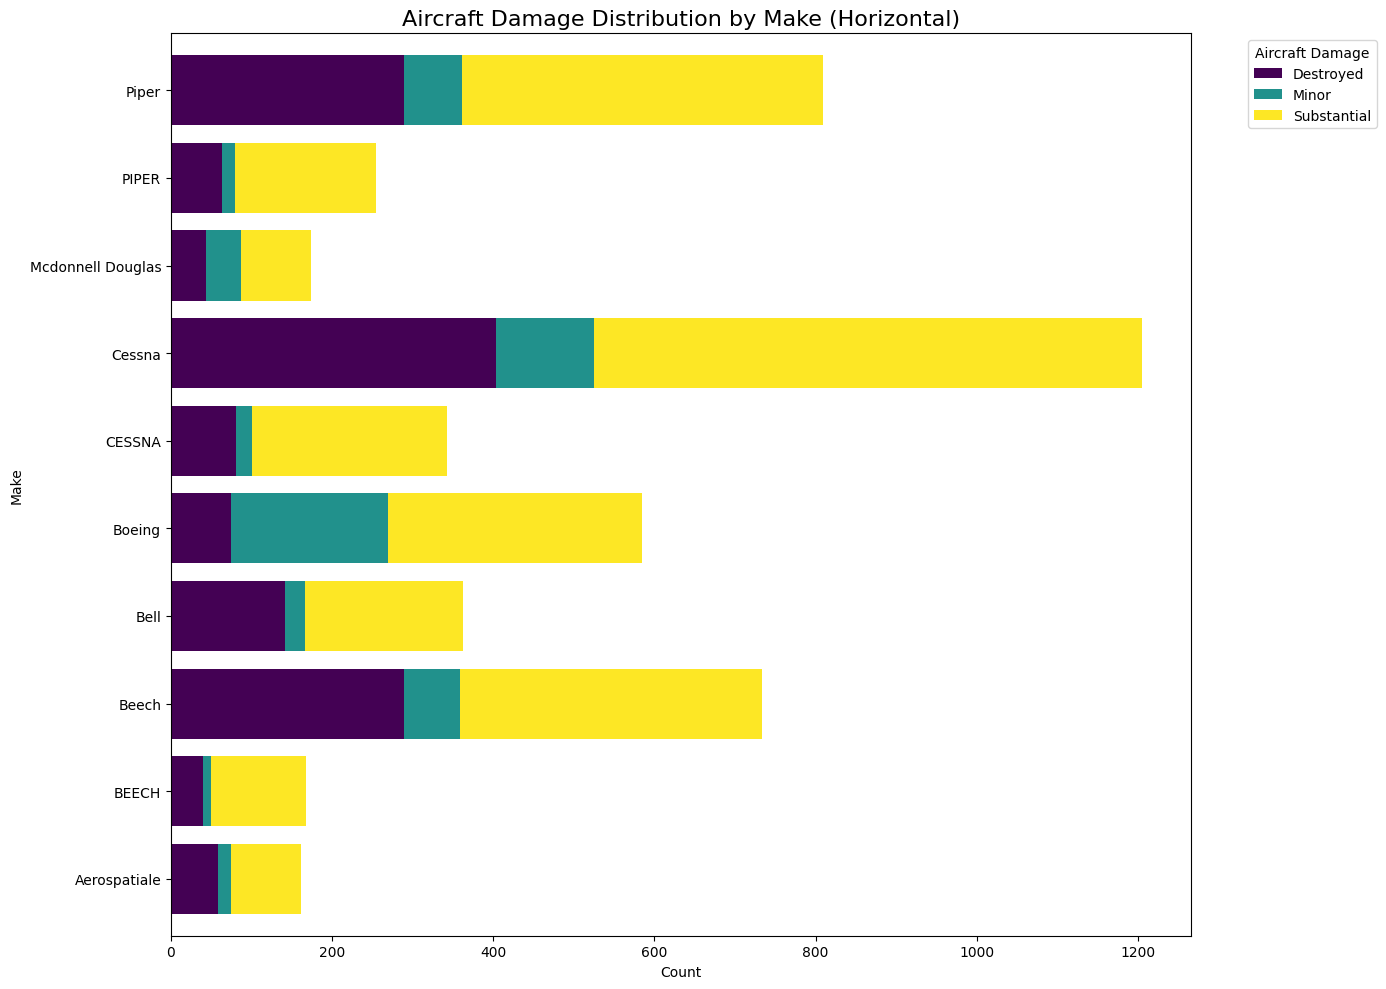

In [17]:
# Calculate damage counts for the top makes
top_damage_counts = damage_analysis[damage_analysis['Make'].isin(top_makes)].groupby(['Make', 'Aircraft.damage']).size().unstack(fill_value=0)

# Plot horizontal bar chart
top_damage_counts.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 10),
    colormap='viridis',
    width=0.8
)
plt.title('Aircraft Damage Distribution by Make (Horizontal)', fontsize=16)
plt.ylabel('Make')
plt.xlabel('Count')
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


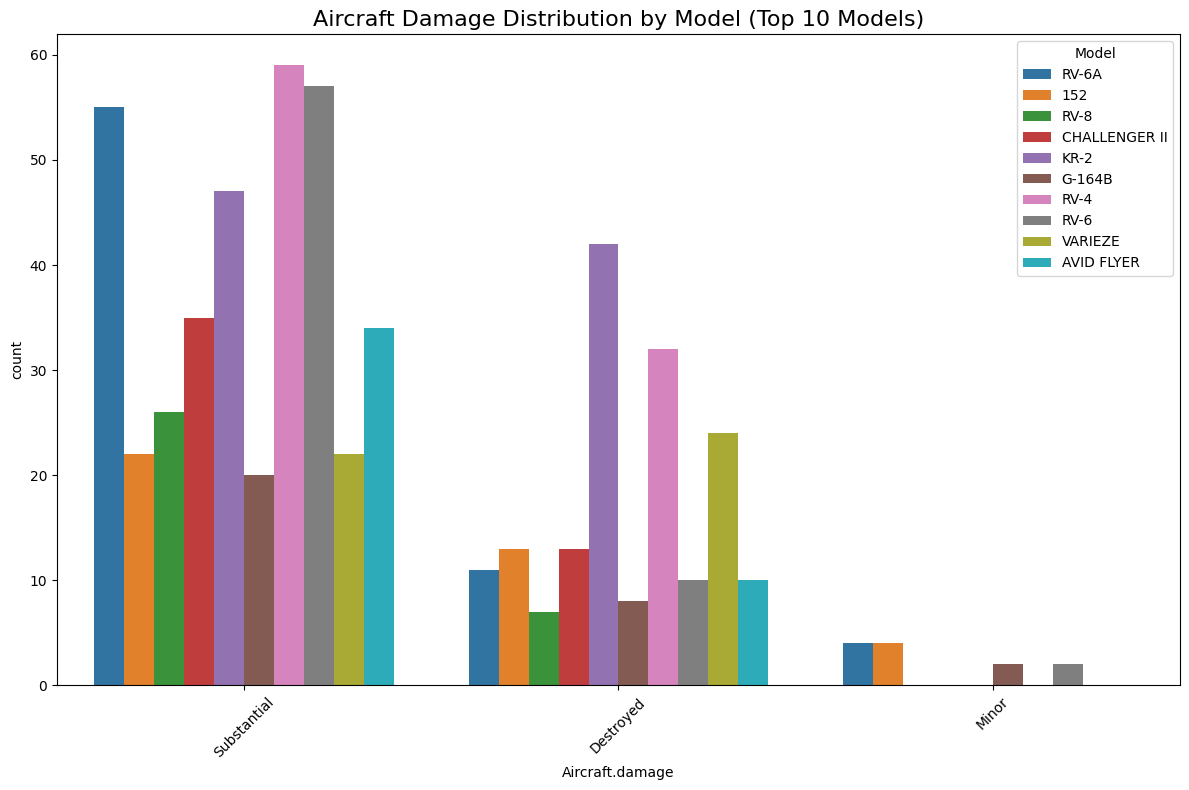

In [18]:
top_models = damage_analysis['Model'].value_counts().head(10).index
filtered_df = damage_analysis[damage_analysis['Model'].isin(top_models)]


plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_df,
    x='Aircraft.damage',
    hue='Model',
    order=damage_analysis['Aircraft.damage'].value_counts().index
)
plt.title('Aircraft Damage Distribution by Model (Top 10 Models)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

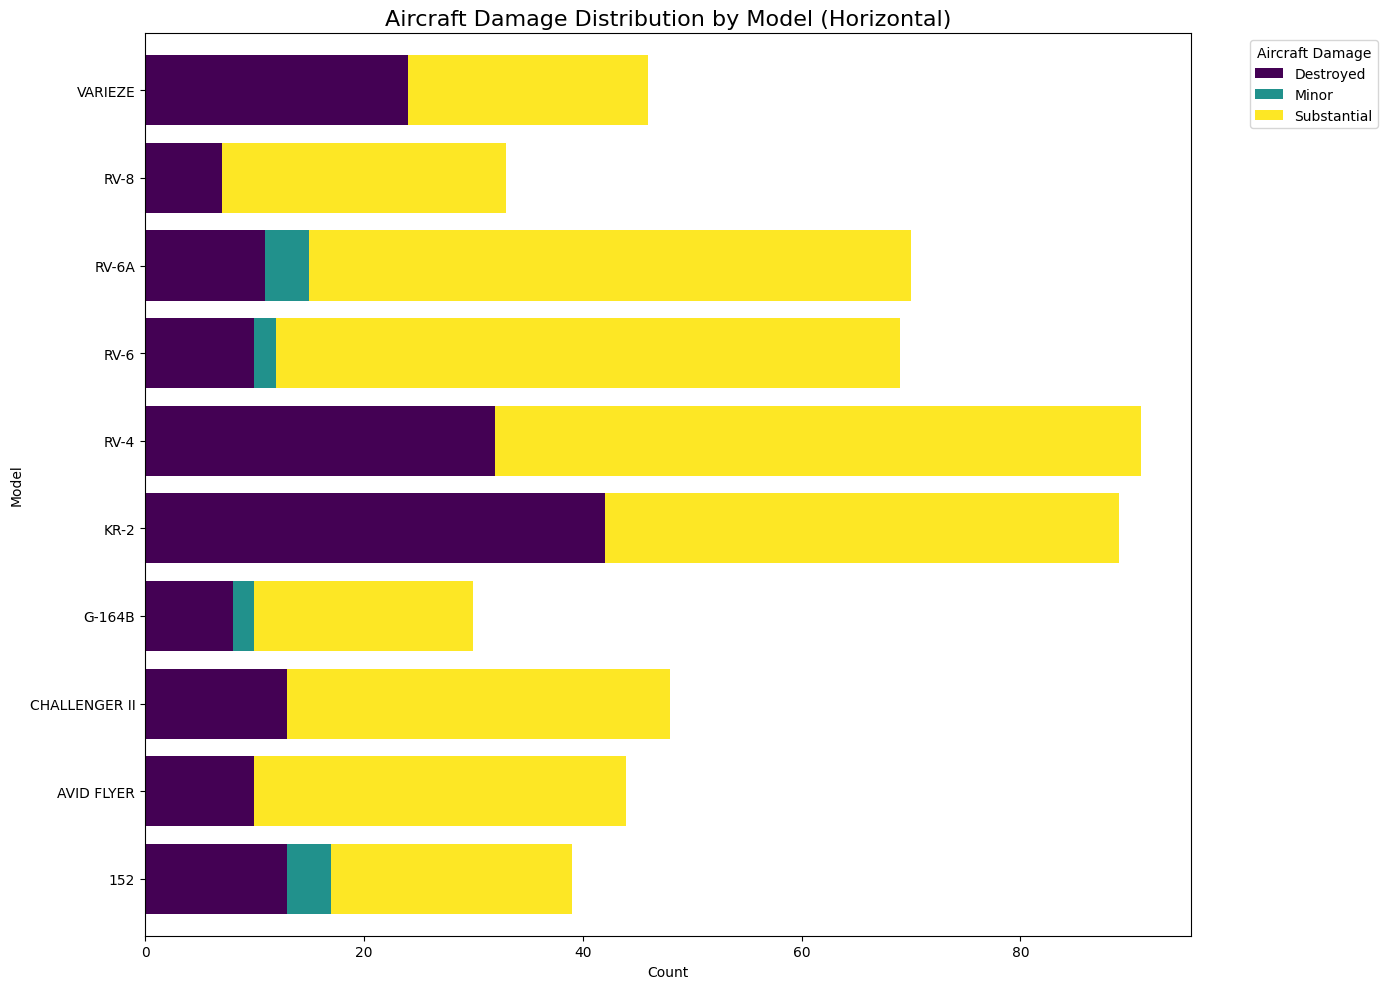

In [19]:
#Calculate damage counts for the top models
top_damage_counts = damage_analysis[damage_analysis['Model'].isin(top_models)].groupby(['Model', 'Aircraft.damage']).size().unstack(fill_value=0)
top_damage_counts.to_csv('top_damage_counts_data.csv', index=False)
# Plot horizontal bar chart
top_damage_counts.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 10),
    colormap='viridis',
    width=0.8
)
plt.title('Aircraft Damage Distribution by Model (Horizontal)', fontsize=16)
plt.ylabel('Model')
plt.xlabel('Count')
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###***Make and Model to completely ignore***

In [20]:
# Group by 'Make' and 'Model' and count occurrences
make_model_damages = damage_analysis.groupby(['Make', 'Model']).size()

# Sort the results in descending order to find the make-model pair with the most accidents
most_damages = make_model_damages.sort_values(ascending=False).head(1)

print("Make and Model with the Most Accidents:")
print(most_damages)


Make and Model with the Most Accidents:
Make    Model
Cessna  172S     3
dtype: int64


###***Makes and Models that are the safest***

In [21]:
# Group by 'Make' and 'Model' and count occurrences
make_model_damages = damage_analysis.groupby(['Make', 'Model']).size()

# Sort the results in ascending order to find the make-model pairs with the least accidents
least_damages = make_model_damages[make_model_damages == make_model_damages.min()]

print("Make and Models with the Least Damages:")
print(least_damages)


Make and Models with the Least Damages:
Make                      Model            
107.5 Flying Corporation  One Design DR 107    1
1200                      G103                 1
1977 Colfer-chan          STEEN SKYBOLT        1
1st Ftr Gp                FOCKE-WULF 190       1
2000 Mccoy                Genesis              1
                                              ..
de Havilland              DHC-2 MK I           1
                          DHC-3                1
                          DHC-6-200            1
                          DHC-8-202            1
unknown                   kit                  1
Length: 13977, dtype: int64


In [22]:
# Group by 'Make' and 'Model' and count occurrences
make_model_damages = damage_analysis.groupby(['Make', 'Model']).size()

# Sort the results in descending order to get the top 5
top_5_damages = make_model_damages.sort_values(ascending=False).head(5)

print("Top 5 Makes and Models with the Most Damages:")
print(top_5_damages)


Top 5 Makes and Models with the Most Damages:
Make    Model  
Cessna  172S       3
Bell    206L-1     3
Cessna  150L       3
Boeing  727-200    3
Cessna  340        3
dtype: int64


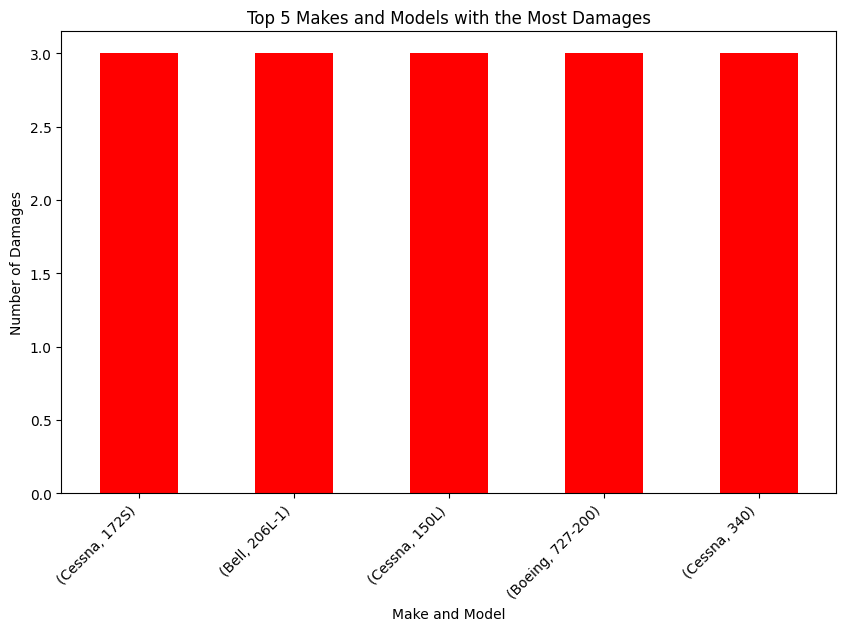

In [23]:
top_5_damages.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Top 5 Makes and Models with the Most Damages')
plt.ylabel('Number of Damages')
plt.xlabel('Make and Model')
plt.xticks(rotation=45, ha='right')
plt.show()


In [24]:
# Group by 'Make' and 'Model' and count occurrences
make_model_damages = damage_analysis.groupby(['Make', 'Model']).size()

# Sort the results in ascending order to get the least 10
least_10_damages = make_model_damages.sort_values(ascending=True).head(10)

print("Top 10 Makes and Models with the Least Accidents:")
print(least_10_damages)


Top 10 Makes and Models with the Least Accidents:
Make                      Model            
107.5 Flying Corporation  One Design DR 107    1
Maule                     MX-7-235             1
                          MX7-180              1
                          MX7-420              1
                          MX7235               1
                          MXT-180              1
                          MXT-7                1
                          MXT-7-108A           1
                          MXT-7-180            1
                          MXT7-180A            1
dtype: int64


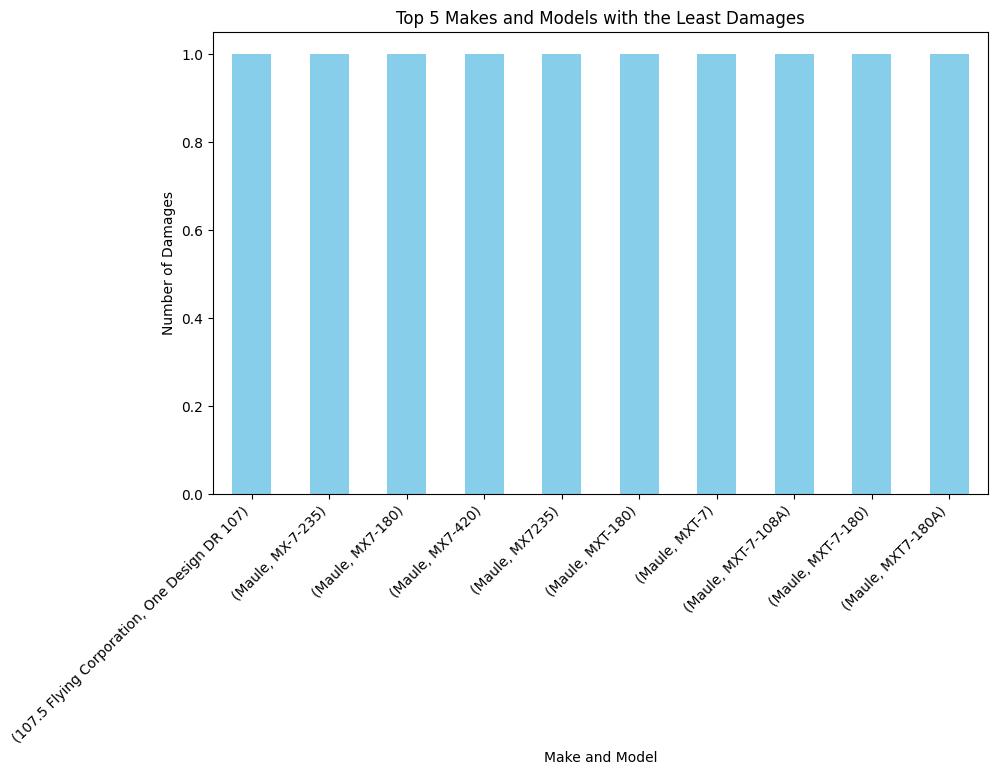

In [25]:
least_10_damages.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Makes and Models with the Least Damages')
plt.ylabel('Number of Damages')
plt.xlabel('Make and Model')
plt.xticks(rotation=45, ha='right')
plt.show()

###***Comparing the make and model vs the total number of injuries in the event of an accident***###

Top 10 Make and Model Pairs by Number of Injuries:
Make    Model    
Boeing  737-200      1064.0
Cessna  152           993.0
Piper   PA-28-140     877.0
Cessna  172N          835.0
Piper   PA-28-181     642.0
BOEING  737           640.0
Cessna  172           616.0
        172M          561.0
Piper   PA-28-180     533.0
Bell    206B          530.0
Name: Total.Injuries, dtype: float64


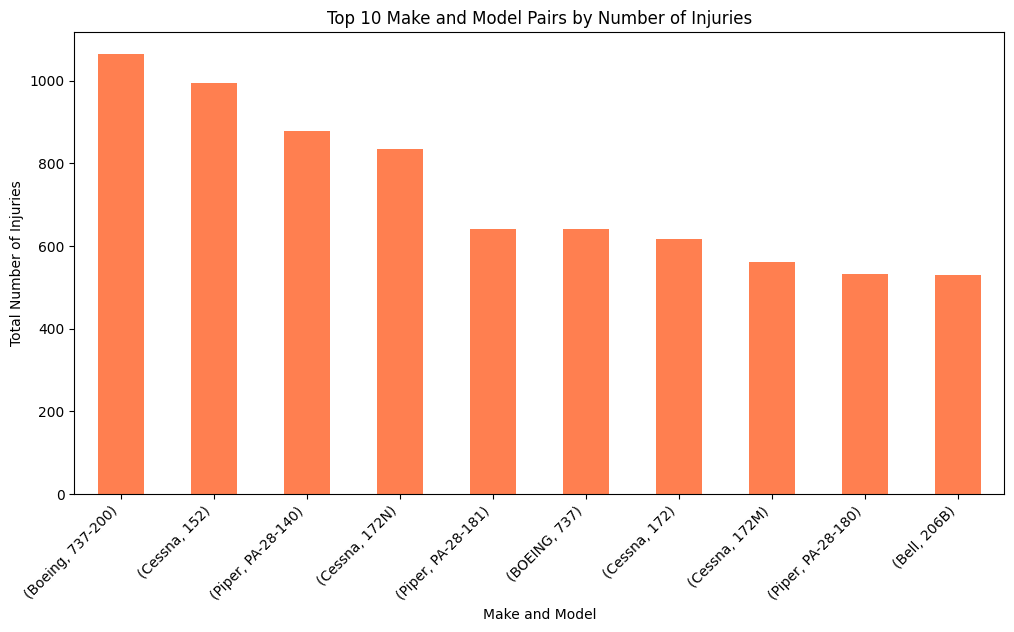

In [26]:
# Combine all injury columns into a single 'Total Injuries' column
df_aviation['Total.Injuries'] = (
    df_aviation['Total.Fatal.Injuries'].fillna(0)
    + df_aviation['Total.Serious.Injuries'].fillna(0)
    + df_aviation['Total.Minor.Injuries'].fillna(0)
)

# Group by 'Make' and 'Model' and sum the total injuries
make_model_injuries = df_aviation.groupby(['Make', 'Model'])['Total.Injuries'].sum()
# Sort the results to find pairs with the highest injuries
make_model_injuries_sorted = make_model_injuries.sort_values(ascending=False)
make_model_injuries_sorted.to_csv('make_injuries_data.csv', index=False)
# Display the top 10 results
top_10_injuries = make_model_injuries_sorted.head(10)
print("Top 10 Make and Model Pairs by Number of Injuries:")
print(top_10_injuries)

# Plot the top 10 make-model pairs by number of injuries
plt.figure(figsize=(12, 6))
top_10_injuries.plot(kind='bar', color='coral')
plt.title('Top 10 Make and Model Pairs by Number of Injuries')
plt.ylabel('Total Number of Injuries')
plt.xlabel('Make and Model')
plt.xticks(rotation=45, ha='right')
plt.show()


Top 10 Make and Model Pairs by Number of Injuries:
Make    Model    
Boeing  737-200      1064.0
Cessna  152           993.0
Piper   PA-28-140     877.0
Cessna  172N          835.0
Piper   PA-28-181     642.0
BOEING  737           640.0
Cessna  172           616.0
        172M          561.0
Piper   PA-28-180     533.0
Bell    206B          530.0
Name: Total.Injuries, dtype: float64


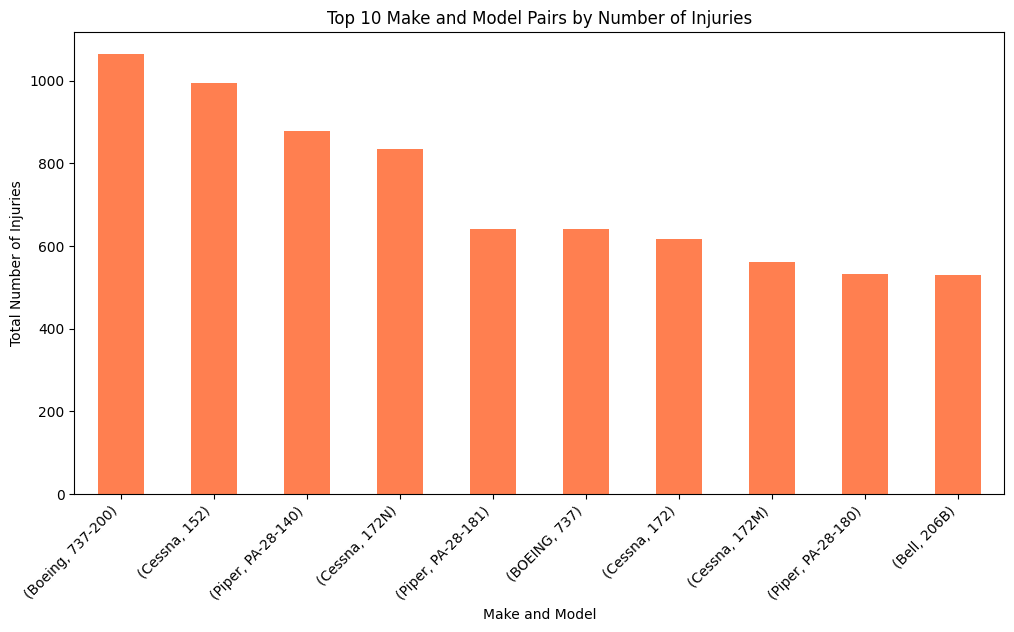

Bottom 10 Make and Model Pairs by Number of Injuries:
Make                    Model               
Canadian Car & Foundry  Mark IV                 0.0
Piper                   J4E                     0.0
Canard, Inc.            LONG EZ                 0.0
Piper                   J4/E                    0.0
                        J3L-65S                 0.0
Cannon                  STARDUSTER II           0.0
Cano                    AVID FLYER              0.0
Cantlon                 Starduster Too SA300    0.0
Piper                   J3F                     0.0
Raytheon                B-1900                  0.0
Name: Total.Injuries, dtype: float64


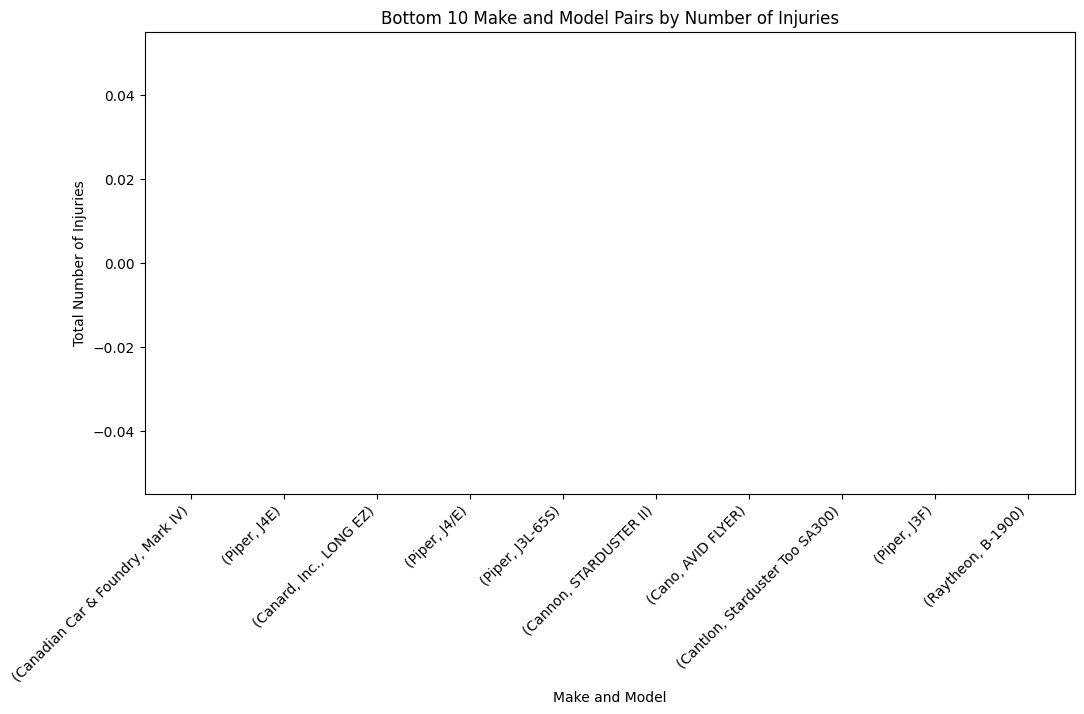

In [27]:
# Top 10 Make and Model pairs
top_10_injuries = make_model_injuries_sorted.head(10)
print("Top 10 Make and Model Pairs by Number of Injuries:")
print(top_10_injuries)

plt.figure(figsize=(12, 6))
top_10_injuries.plot(kind='bar', color='coral')
plt.title('Top 10 Make and Model Pairs by Number of Injuries')
plt.ylabel('Total Number of Injuries')
plt.xlabel('Make and Model')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom 10 Make and Model pairs
bottom_10_injuries = make_model_injuries_sorted.tail(10)
print("Bottom 10 Make and Model Pairs by Number of Injuries:")
print(bottom_10_injuries)

plt.figure(figsize=(12, 6))
bottom_10_injuries.plot(kind='bar', color='lightblue')
plt.title('Bottom 10 Make and Model Pairs by Number of Injuries')
plt.ylabel('Total Number of Injuries')
plt.xlabel('Make and Model')
plt.xticks(rotation=45, ha='right')
plt.show()


In [28]:
# 1. Group by Make and Model, and analyze the number of engines
engine_analysis = df_aviation.groupby(['Make', 'Model'])['Number.of.Engines'].agg([
    'count',  # Number of incidents
    'mean',   # Average number of engines
    'min',    # Minimum number of engines
    'max'     # Maximum number of engines
]).reset_index()

# Sort by number of incidents in descending order
engine_analysis_sorted = engine_analysis.sort_values('count', ascending=False)
print("\nEngine Analysis by Make and Model:")
print(engine_analysis_sorted.head(10))
engine_analysis_sorted.to_csv('make_engine_data.csv', index=False)



Engine Analysis by Make and Model:
         Make      Model  count      mean  min  max
4623   Cessna        152   2179  1.001836  0.0  4.0
4644   Cessna        172   1042  0.999040  0.0  1.0
4688   Cessna       172N    996  1.000000  1.0  1.0
12357   Piper  PA-28-140    811  0.998767  0.0  1.0
4598   Cessna        150    669  1.002990  1.0  2.0
4686   Cessna       172M    667  0.998501  0.0  1.0
4691   Cessna       172P    596  1.000000  1.0  1.0
4622   Cessna       150M    539  1.000000  1.0  1.0
12251   Piper      PA-18    538  0.990706  0.0  1.0
12366   Piper  PA-28-161    502  1.001992  1.0  2.0


In [29]:
# 2. Distribution of number of engines across Makes
make_engine_dist = df_aviation.groupby('Make')['Number.of.Engines'].agg([
    'count',
    'mean',
    'min',
    'max'
]).sort_values('count', ascending=False)
print("\nEngine Distribution by Make:")
print(make_engine_dist.head(10))



Engine Distribution by Make:
          count      mean  min  max
Make                               
Cessna    21526  1.083341  0.0  4.0
Piper     11564  1.147008  0.0  4.0
Beech      4152  1.378854  0.0  2.0
CESSNA     2236  1.093918  1.0  2.0
Bell       2064  1.036337  0.0  2.0
Boeing     1530  1.979739  0.0  4.0
PIPER      1328  1.134789  1.0  2.0
Grumman    1073  1.072693  0.0  2.0
Mooney     1050  1.000000  0.0  2.0
Bellanca    882  0.998866  0.0  1.0


<ipython-input-30-129bcc1a29bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


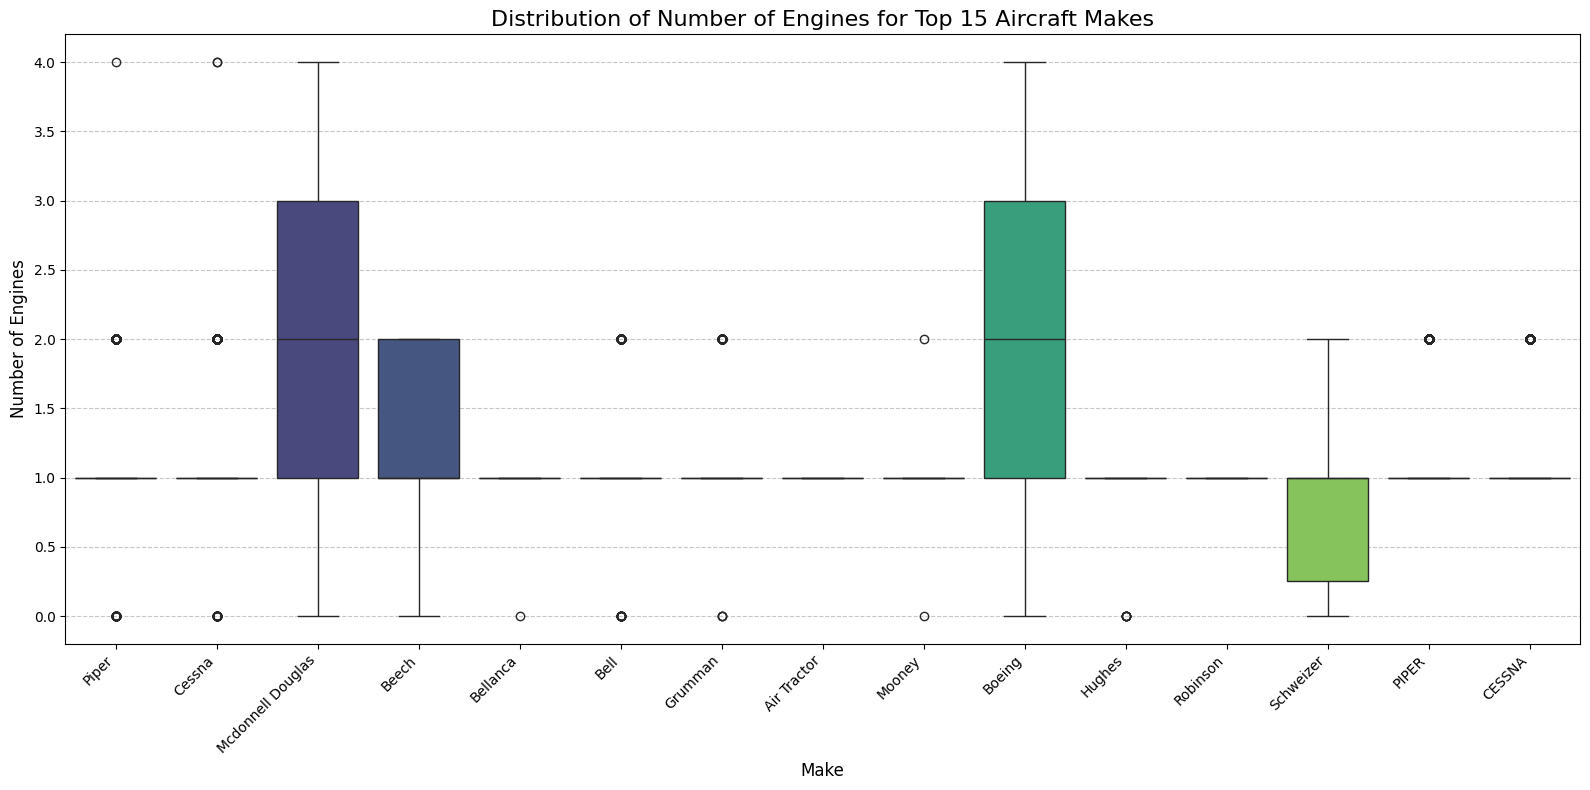

In [30]:
top_makes = df_aviation['Make'].value_counts().nlargest(15).index

plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Make',
    y='Number.of.Engines',
    data=df_aviation[df_aviation['Make'].isin(top_makes)],
    palette='viridis'
)

plt.title('Distribution of Number of Engines for Top 15 Aircraft Makes', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Number of Engines', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# 4. Create a pivot table for a detailed view
engine_pivot = df_aviation.pivot_table(
    values='Number.of.Engines',
    index='Make',
    columns='Model',
    aggfunc=['count', 'mean']
)
print("\nPivot Table of Engines by Make and Model:")
print(engine_pivot.head())


Pivot Table of Engines by Make and Model:
                         count                                               \
Model                    &GCBC (MODIFIED) (SOLOY CONVERSION) -269C -737-222   
Make                                                                          
107.5 Flying Corporation   NaN        NaN                NaN   NaN      NaN   
1200                       NaN        NaN                NaN   NaN      NaN   
1977 Colfer-chan           NaN        NaN                NaN   NaN      NaN   
1st Ftr Gp                 NaN        NaN                NaN   NaN      NaN   
2000 Mccoy                 NaN        NaN                NaN   NaN      NaN   

                                                      ...            mean  \
Model                    0-1A 0-47B 0-58A 0-58B 0-77  ... Zodiac CH-601-H   
Make                                                  ...                   
107.5 Flying Corporation  NaN   NaN   NaN   NaN  NaN  ...             NaN   
1200            

In [32]:
# Correlation between number of engines and other numerical columns
numerical_columns = df_aviation.select_dtypes(include=['int64', 'float64']).columns
correlation = df_aviation[['Number.of.Engines'] + list(numerical_columns)].corr()['Number.of.Engines']
print("\nCorrelation of Number of Engines with Other Numerical Columns:")
print(correlation)


Correlation of Number of Engines with Other Numerical Columns:
                        Number.of.Engines  Number.of.Engines
Number.of.Engines                1.000000           1.000000
Number.of.Engines                1.000000           1.000000
Total.Fatal.Injuries             0.059186           0.059186
Total.Serious.Injuries           0.028632           0.028632
Total.Minor.Injuries             0.054734           0.054734
Total.Uninjured                  0.371443           0.371443
Total.Injuries                   0.076082           0.076082


###***Checking for the distribution of the aviation accidents across the globe***

In [33]:

import folium
import plotly.express as px
import plotly.graph_objs as go
#Create severity score (based on fatal injuries and damage)
def calculate_severity_score(row):
    fatal_score = row['Total.Fatal.Injuries'] * 3
    damage_score = 2 if row['Aircraft.damage'] == 'Destroyed' else 1
    return fatal_score + damage_score

df_aviation['Severity_Score'] = df_aviation.apply(calculate_severity_score, axis=1)



def create_severity_map(df_aviation):
    """
    Creates an intuitive, interactive world map showing aviation accident severity.
    The map displays accident locations, with marker size representing severity
    and color indicating aircraft damage.

    Parameters:
        df_aviation (DataFrame): Aviation dataset containing location, damage,
                                 and severity information.

    Returns:
        plotly.graph_objects.Figure: Geospatial visualization.
    """
    # Ensure required columns are present and drop missing coordinates
    required_columns = ['Latitude', 'Longitude', 'Aircraft.damage', 'Severity_Score', 'Location']
    if not all(col in df_aviation.columns for col in required_columns):
        raise ValueError(f"Dataset must contain the following columns: {required_columns}")

    df_cleaned = df_aviation.dropna(subset=['Latitude', 'Longitude'])
    df_cleaned.to_csv('severity_data.csv', index=False)
    # Create the map
    fig = px.scatter_geo(
        df_cleaned,
        lat='Latitude',
        lon='Longitude',
        color='Aircraft.damage',
        size='Severity_Score',
        hover_name='Location',
        hover_data={
            'Total.Fatal.Injuries': True,
            'Aircraft.Category': True,
            'Severity_Score': ':.2f',
        },
        color_discrete_map={
            'Destroyed': 'red',
            'Substantial': 'orange',
            'Minor': 'yellow'  # Optional if minor damage exists
        },
        projection='natural earth',
        title='Aviation Accidents: Severity and Damage Worldwide'
    )

    # Customize layout for clarity
    fig.update_layout(
        geo=dict(
            showland=True,
            landcolor='rgb(240, 240, 240)',  # Softer land color
            countrycolor='rgb(204, 204, 204)',  # Neutral country borders
            coastlinecolor='rgb(158, 158, 158)',  # Visible coastlines
        ),
        legend_title=dict(text="Aircraft Damage"),
        margin=dict(l=0, r=0, t=50, b=0),  # Tighter margins
        height=700  # Increased map height for better visibility
    )

    # Add meaningful annotations
    fig.update_traces(
        marker=dict(opacity=0.8, line=dict(width=0.5, color='darkgray')),
        selector=dict(mode='markers')
    )

    return fig


# Generate and show the enhanced severity map
try:
    severity_map = create_severity_map(df_aviation)
    severity_map.show()
except ValueError as e:
    print(f"Error creating severity map: {e}")


In [34]:
def create_damage_pie_chart(df_aviation):
    """
    Creates a pie chart showing the distribution of aircraft damage.
    """
    damage_distribution = df_aviation['Aircraft.damage'].value_counts()
    fig = px.pie(
        values=damage_distribution.values,
        names=damage_distribution.index,
        title='Aircraft Damage Distribution'
    )
    return fig


# Generate and show the pie chart
damage_pie = create_damage_pie_chart(df_aviation)
damage_pie.show()


In [35]:
def create_category_bar_chart(df_aviation):
    """
    Creates a bar chart showing total severity by aircraft category.
    """
    category_severity = df_aviation.groupby('Aircraft.Category')['Severity_Score'].sum().reset_index()
    fig = px.bar(
        category_severity,
        x='Aircraft.Category',
        y='Severity_Score',
        title='Total Severity by Aircraft Category'
    )
    return fig


# Generate and show the bar chart
category_plot = create_category_bar_chart(df_aviation)
category_plot.show()


In [36]:
def print_summary_statistics(df_aviation):
    """
    Prints summary statistics for fatal injuries and severity score.
    """
    summary = df_aviation.groupby('Aircraft.Category').agg({
        'Total.Fatal.Injuries': ['sum', 'mean'],
        'Severity_Score': ['sum', 'mean']
    })
    print("Severity Analysis Summary:")
    print(summary)


# Display summary statistics
print_summary_statistics(df_aviation)


Severity Analysis Summary:
                  Total.Fatal.Injuries           Severity_Score          
                                   sum      mean            sum      mean
Aircraft.Category                                                        
Airplane                       40926.0  0.569183       210998.0  2.934481
Balloon                           14.0  0.099291          193.0  1.368794
Blimp                              0.0  0.000000            3.0  1.000000
Glider                            46.0  0.146965          471.0  1.504792
Gyrocraft                         14.0  0.181818          130.0  1.688312
Helicopter                       958.0  0.510389         5045.0  2.687800
Powered Parachute                  8.0  0.133333           84.0  1.400000
Powered-Lift                       0.0  0.000000            5.0  1.250000
Ultralight                         5.0  0.238095           40.0  1.904762
Unknown                            1.0  0.500000            6.0  3.000000
Weight-Shif

In [37]:
# Group data by Make, Model, and Engine Type, and count occurrences of Aircraft Damage
make_model_engine_damage = (
    df_aviation.groupby(['Make', 'Model', 'Engine.Type'])['Aircraft.damage']
    .count()
    .reset_index()
    .rename(columns={'Aircraft.damage': 'Number_of_Damages'})
)

In [38]:
make_model_engine_damage_sorted = make_model_engine_damage.sort_values(
    by='Number_of_Damages', ascending=False
)

# Display the top 10 Make-Model-Engine Type combinations with the most damages
top_10_damages = make_model_engine_damage_sorted.head(10)
print("Top 10 Make-Model-Engine Type combinations with the most damages:")
print(top_10_damages)

Top 10 Make-Model-Engine Type combinations with the most damages:
         Make      Model    Engine.Type  Number_of_Damages
5071   Cessna        152  Reciprocating               2176
5094   Cessna        172  Reciprocating               1041
5143   Cessna       172N  Reciprocating                996
13198   Piper  PA-28-140  Reciprocating                806
5045   Cessna        150  Reciprocating                669
5140   Cessna       172M  Reciprocating                662
5146   Cessna       172P  Reciprocating                595
5070   Cessna       150M  Reciprocating                539
13082   Piper      PA-18  Reciprocating                531
13209   Piper  PA-28-161  Reciprocating                500


Bottom 10 Make-Model-Engine Type combinations with the least damages:
                   Make                 Model    Engine.Type  \
7163              EAGLE                  150B  Reciprocating   
7164              EAGLE                  DW-1  Reciprocating   
7165              EAGLE                   DW1  Reciprocating   
7166              EAGLE            Eagle DW-1  Reciprocating   
7167       EASLER KELLY             RANS S6ES  Reciprocating   
7168             EASTON                SEAREY  Reciprocating   
7169      EBERLE JOHN S  FOKKER DR-1 TRIPLANE  Reciprocating   
7170             ECCKER      HURRICANE HAULER  Reciprocating   
7171   ECKENRODE CARL J             VANS RV-6  Reciprocating   
17438           unknown                   kit  Reciprocating   

       Number_of_Damages  
7163                   1  
7164                   1  
7165                   1  
7166                   1  
7167                   1  
7168                   1  
7169                   1  
7170     

<ipython-input-39-10dad8be2799>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




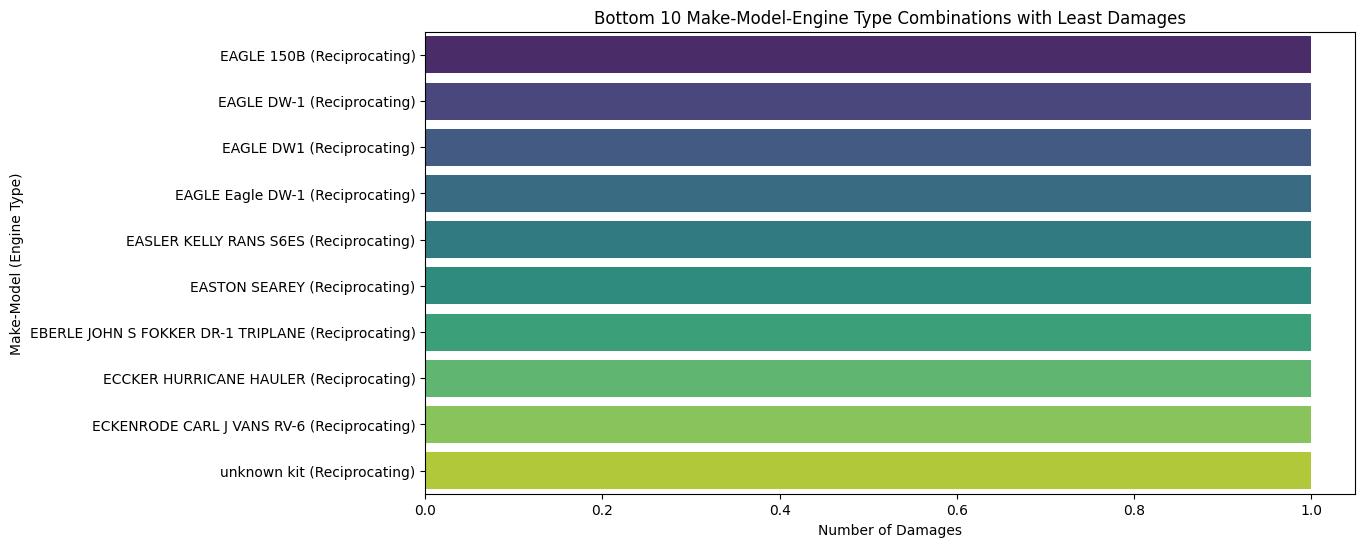

In [39]:
# Get the bottom 10 Make-Model-Engine Type combinations with the least damages
bottom_10_damages = make_model_engine_damage_sorted.tail(10)
print("Bottom 10 Make-Model-Engine Type combinations with the least damages:")
print(bottom_10_damages)

# Visualize the bottom 10 using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom_10_damages,
    x='Number_of_Damages',
    y=bottom_10_damages['Make'] + " " + bottom_10_damages['Model'] + " (" + bottom_10_damages['Engine.Type'] + ")",
    palette='viridis'
)
plt.title('Bottom 10 Make-Model-Engine Type Combinations with Least Damages')
plt.xlabel('Number of Damages')
plt.ylabel('Make-Model (Engine Type)')
plt.show()


In [40]:
#saving the comparison data frames as csv to allow for easier visualization by tableau
df_aviation = pd.read_csv('/content/AviationData.csv', encoding='latin-1', low_memory=False)
df_aviation = df_aviation.dropna(subset=['Latitude', 'Longitude'])
df_aviation.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                      0
Longitude                     0
Airport.Code              12074
Airport.Name              11813
Injury.Severity             233
Aircraft.damage             944
Aircraft.Category          8414
Registration.Number         446
Make                         22
Model                        28
Amateur.Built                31
Number.of.Engines          2228
Engine.Type                4317
FAR.Description            8515
Schedule                  31410
Purpose.of.flight          3301
Air.carrier               21652
Total.Fatal.Injuries       9244
Total.Serious.Injuries    10125
Total.Minor.Injuries       9605
Total.Uninjured            4713
Weather.Condition          1736
Broad.phase.of.flight     22882
Report.Status              3996
Publication.Date            605
dtype: int64

##**Findings**


*   From the data above it is clear that most of the accident happened in the USA. This is due to the high frequency of flights in the region thereby, increasing the probability of the occurence of accidents.
*   CESSNA model 550 had the most damage count therefore indicating the volume of accidents and 107.5 Flying corporation, Maule having the least volume of damages. This could be attributed to popularity or lack thereof of the corresponding models. The volume of damages in the CESSNA 550 could be because they are the most popular attributed to other external factors not highlighted in the provided in the data being analyzed.
*  The BOEING 737 had the most number of injuries while OLSEN KITFOXII had 0 injuries. This could be to the size of the boeing which could increase the number of injuries in case of an accident/incident. The OLSEN might have 0 injuries because no one survived the accident/incident.
*   The Airplane had the poorest severity score as compared to other forms of airplane followed by the Helicopter this could be due to the frequency of use nad popularity thereby increasing the the probability of an accident.



